## Algorytm Genetyczny

Spherical Function - Best Individual: [0.039812110809544166, 0.042820188844310714]
Spherical Function - Best Fitness: 0.003418572739773855
Rastrigin Function - Best Individual: [-0.020049263904306613, -0.042938029301471836]
Rastrigin Function - Best Fitness: 0.4432117611248181


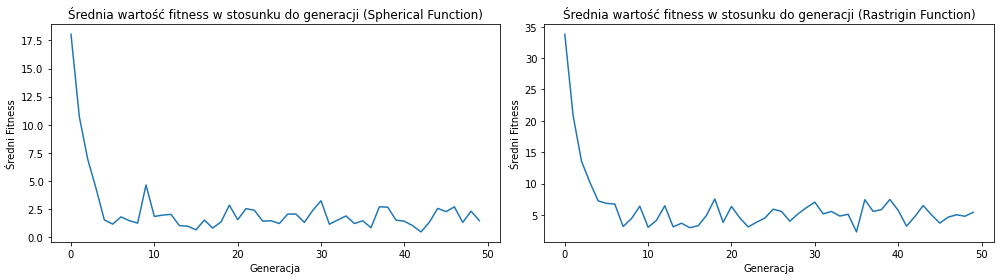

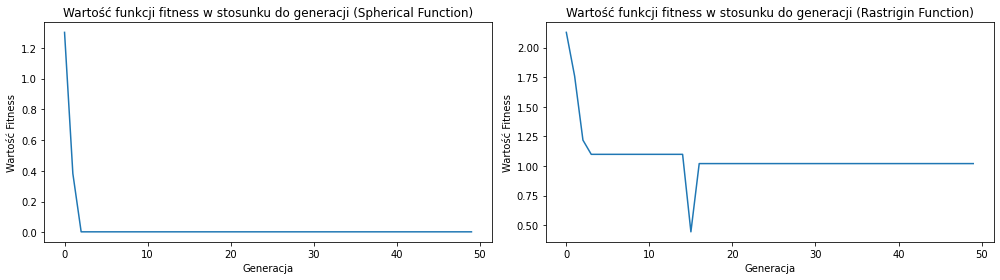

In [39]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

# Funkcja celu - sferyczna
def spherical_function(x, y):
    return x**2 + y**2

# Funkcja celu - Rastrigin
def rastrigin_function(x, y):
    A = 10
    return A * 2 + (x**2 - A * np.cos(2 * math.pi * x)) + (y**2 - A * np.cos(2 * math.pi * y))

# Inicjalizacja populacji
def initialize_population(population_size):
    population = []
    for _ in range(population_size):
        x = random.uniform(-5.12, 5.12)
        y = random.uniform(-5.12, 5.12)
        population.append([x, y])
    return population

# Algorytm genetyczny
def genetic_algorithm(population_size, fitness_func, num_generations):
    population = initialize_population(population_size)
    best_fitness = float('inf')
    best_individual = None
    generation_data = []

    for generation in range(num_generations):
        fitness_scores = []
        for individual in population:
            fitness = fitness_func(*individual)
            fitness_scores.append(fitness)
            if fitness < best_fitness:
                best_fitness = fitness
                best_individual = individual

        generation_data.append((generation, population, fitness_scores))

        selected = tournament_selection(population, fitness_scores, tournament_size=3)
        offspring = []

        while len(offspring) < population_size:
            parent1 = random.choice(selected)
            parent2 = random.choice(selected)
            child1, child2 = single_point_crossover(parent1, parent2)
            child1 = mutation(child1, mutation_rate=0.1)
            child2 = mutation(child2, mutation_rate=0.1)
            offspring.append(child1)
            offspring.append(child2)

        population = offspring

    return best_individual, best_fitness, generation_data

# Selekcja turniejowa
def tournament_selection(population, fitness_scores, tournament_size):
    selected = []
    for _ in range(len(population)):
        tournament = random.sample(range(len(population)), tournament_size)
        tournament_fitness = [fitness_scores[i] for i in tournament]
        winner_index = tournament_fitness.index(min(tournament_fitness))
        winner = population[tournament[winner_index]].copy()
        selected.append(winner)
    return selected

# Krzyżowanie jednopunktowe
def single_point_crossover(parent1, parent2):
    point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]
    return child1, child2

# Mutacja
def mutation(individual, mutation_rate):
    x, y = individual
    if random.random() < mutation_rate:
        x = random.uniform(-5.12, 5.12)
    if random.random() < mutation_rate:
        y = random.uniform(-5.12, 5.12)
    return [x, y]

# Parametry algorytmu genetycznego
population_size = 50
num_generations = 50

# Wywołanie algorytmu dla funkcji celu sferycznej
best_individual_spherical, best_fitness_spherical, generation_data_spherical = genetic_algorithm(
    population_size, spherical_function, num_generations
)
print("Spherical Function - Best Individual:", best_individual_spherical)
print("Spherical Function - Best Fitness:", best_fitness_spherical)

# Wywołanie algorytmu dla funkcji celu Rastrigin
best_individual_rastrigin, best_fitness_rastrigin, generation_data_rastrigin = genetic_algorithm(
    population_size, rastrigin_function, num_generations
)
print("Rastrigin Function - Best Individual:", best_individual_rastrigin)
print("Rastrigin Function - Best Fitness:", best_fitness_rastrigin)

# Obliczanie średniej wartości fitness dla każdej generacji
average_fitness_spherical = [np.mean(data[2]) for data in generation_data_spherical]
average_fitness_rastrigin = [np.mean(data[2]) for data in generation_data_rastrigin]

# Wykres średniej wartości fitness w stosunku do generacji
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(range(num_generations), average_fitness_spherical)
plt.xlabel('Generacja')
plt.ylabel('Średni Fitness')
plt.title('Średnia wartość fitness w stosunku do generacji (Spherical Function)')

plt.subplot(1, 2, 2)
plt.plot(range(num_generations), average_fitness_rastrigin)
plt.xlabel('Generacja')
plt.ylabel('Średni Fitness')
plt.title('Średnia wartość fitness w stosunku do generacji (Rastrigin Function)')

plt.tight_layout()
plt.show()

# Pobranie wartości fitness dla każdej generacji
fitness_values_spherical = [min(data[2]) for data in generation_data_spherical]
fitness_values_rastrigin = [min(data[2]) for data in generation_data_rastrigin]

# Wykres wartości funkcji fitness w stosunku do generacji
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(range(num_generations), fitness_values_spherical)
plt.xlabel('Generacja')
plt.ylabel('Wartość Fitness')
plt.title('Wartość funkcji fitness w stosunku do generacji (Spherical Function)')

plt.subplot(1, 2, 2)
plt.plot(range(num_generations), fitness_values_rastrigin)
plt.xlabel('Generacja')
plt.ylabel('Wartość Fitness')
plt.title('Wartość funkcji fitness w stosunku do generacji (Rastrigin Function)')

plt.tight_layout()
plt.show()



MovieWriter imagemagick unavailable; using Pillow instead.


Spherical Function - Best Individual: [0.005572065663809411, 0.047990704820978]
Spherical Function - Best Fitness: 0.0023341556649760452
Rastrigin Function - Best Individual: [0.0003451747251377313, -0.030404077385921546]
Rastrigin Function - Best Fitness: 0.18286460330665832


MovieWriter imagemagick unavailable; using Pillow instead.


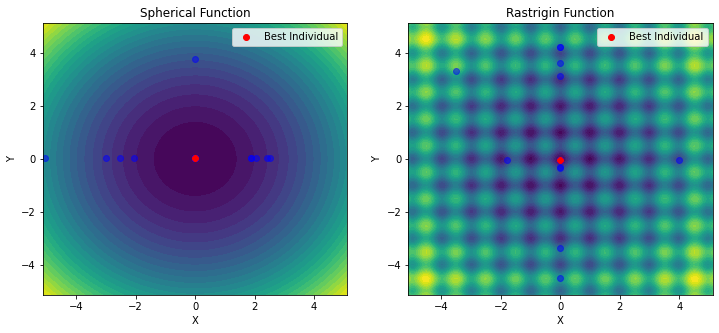

In [42]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Funkcja celu - sferyczna
def spherical_function(x, y):
    return x**2 + y**2

# Funkcja celu - Rastrigin
def rastrigin_function(x, y):
    A = 10
    return A * 2 + (x**2 - A * np.cos(2 * math.pi * x)) + (y**2 - A * np.cos(2 * math.pi * y))

# Inicjalizacja populacji
def initialize_population(population_size):
    population = []
    for _ in range(population_size):
        x = random.uniform(-5.12, 5.12)
        y = random.uniform(-5.12, 5.12)
        population.append([x, y])
    return population

# Algorytm genetyczny
def genetic_algorithm(population_size, fitness_func, num_generations):
    population = initialize_population(population_size)
    best_fitness = float('inf')
    best_individual = None
    generation_data = []

    for generation in range(num_generations):
        fitness_scores = []
        for individual in population:
            fitness = fitness_func(*individual)
            fitness_scores.append(fitness)
            if fitness < best_fitness:
                best_fitness = fitness
                best_individual = individual

        generation_data.append((generation, population, fitness_scores))

        selected = tournament_selection(population, fitness_scores, tournament_size=3)
        offspring = []

        while len(offspring) < population_size:
            parent1 = random.choice(selected)
            parent2 = random.choice(selected)
            child1, child2 = single_point_crossover(parent1, parent2)
            child1 = mutation(child1, mutation_rate=0.1)
            child2 = mutation(child2, mutation_rate=0.1)
            offspring.append(child1)
            offspring.append(child2)

        population = offspring

    return best_individual, best_fitness, generation_data

# Selekcja turniejowa
def tournament_selection(population, fitness_scores, tournament_size):
    selected = []
    for _ in range(len(population)):
        tournament = random.sample(range(len(population)), tournament_size)
        tournament_fitness = [fitness_scores[i] for i in tournament]
        winner_index = tournament_fitness.index(min(tournament_fitness))
        winner = population[tournament[winner_index]].copy()
        selected.append(winner)
    return selected

# Krzyżowanie jednopunktowe
def single_point_crossover(parent1, parent2):
    point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]
    return child1, child2

# Mutacja
def mutation(individual, mutation_rate):
    x, y = individual
    if random.random() < mutation_rate:
        x = random.uniform(-5.12, 5.12)
    if random.random() < mutation_rate:
        y = random.uniform(-5.12, 5.12)
    return [x, y]

# Parametry algorytmu genetycznego
population_size = 50
num_generations = 50

# Wywołanie algorytmu dla funkcji celu sferycznej
best_individual_spherical, best_fitness_spherical, generation_data_spherical = genetic_algorithm(
    population_size, spherical_function, num_generations
)
print("Spherical Function - Best Individual:", best_individual_spherical)
print("Spherical Function - Best Fitness:", best_fitness_spherical)

# Wywołanie algorytmu dla funkcji celu Rastrigin
best_individual_rastrigin, best_fitness_rastrigin, generation_data_rastrigin = genetic_algorithm(
    population_size, rastrigin_function, num_generations
)
print("Rastrigin Function - Best Individual:", best_individual_rastrigin)
print("Rastrigin Function - Best Fitness:", best_fitness_rastrigin)

# Animacja ruchu cząsteczek
particles_spherical = [data[1] for data in generation_data_spherical]
particles_rastrigin = [data[1] for data in generation_data_rastrigin]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.set_xlim(-5.12, 5.12)
ax1.set_ylim(-5.12, 5.12)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Spherical Function')

ax2.set_xlim(-5.12, 5.12)
ax2.set_ylim(-5.12, 5.12)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Rastrigin Function')

scatter_spherical = ax1.scatter([], [], color='blue', alpha=0.5)
scatter_rastrigin = ax2.scatter([], [], color='blue', alpha=0.5)
best_spherical = ax1.scatter([], [], color='red', label='Best Individual')
best_rastrigin = ax2.scatter([], [], color='red', label='Best Individual')

def update(frame):
    ax1.cla()
    ax2.cla()
    ax1.set_xlim(-5.12, 5.12)
    ax1.set_ylim(-5.12, 5.12)
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_title('Spherical Function')

    ax2.set_xlim(-5.12, 5.12)
    ax2.set_ylim(-5.12, 5.12)
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title('Rastrigin Function')

    ax1.contourf(X, Y, Z_spherical, levels=30, cmap='viridis')
    ax2.contourf(X, Y, Z_rastrigin, levels=30, cmap='viridis')
    
    ax1.scatter([particle[0] for particle in particles_spherical[frame]], [particle[1] for particle in particles_spherical[frame]], color='blue', alpha=0.5)
    ax2.scatter([particle[0] for particle in particles_rastrigin[frame]], [particle[1] for particle in particles_rastrigin[frame]], color='blue', alpha=0.5)
    
    ax1.scatter(best_individual_spherical[0], best_individual_spherical[1], color='red', label='Best Individual')
    ax2.scatter(best_individual_rastrigin[0], best_individual_rastrigin[1], color='red', label='Best Individual')
    
    scatter_spherical.set_offsets([particle[:2] for particle in particles_spherical[frame]])
    scatter_rastrigin.set_offsets([particle[:2] for particle in particles_rastrigin[frame]])
    
    best_spherical.set_offsets([best_individual_spherical[:2]])
    best_rastrigin.set_offsets([best_individual_rastrigin[:2]])
    
    ax1.legend(loc='upper right')
    ax2.legend(loc='upper right')

num_generations = len(generation_data_spherical)
ani = FuncAnimation(fig, update, frames=num_generations, interval=500, repeat=True)

# Zapis sekwencji obrazów jako pliki PNG
ani.save('animation_spherical.gif', writer='imagemagick', fps=2)
ani.save('animation_rastrigin.gif', writer='imagemagick', fps=2)

plt.show()